In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qho_time_evolution import Param, Operators

In [19]:
# SIMULATION PARAMETERS

xmin = -20.0
xmax = 20.0
num_x = 40000
tsim = 10
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS -> ADD WFC OFFSET

res = num_x
omega = 1.0
num_wfcs = 8
T = 10
linear_pulse = lambda t: t
times = np.linspace(0, tsim/2, num_t) - tsim/4
pulse = linear_pulse(times)

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [20]:
opr.rho

array([[0.1728, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.1564, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.1415, 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.128 , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.1158, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.1048, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0948, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0858]])

In [21]:
print("Energies\n", opr.energies)

Energies
 [0.49999999999999706, 1.4999999999999938, 2.4999999999999742, 3.4999999999999845, 4.5, 5.499999999999966, 6.499999999999978, 7.500000000000005]


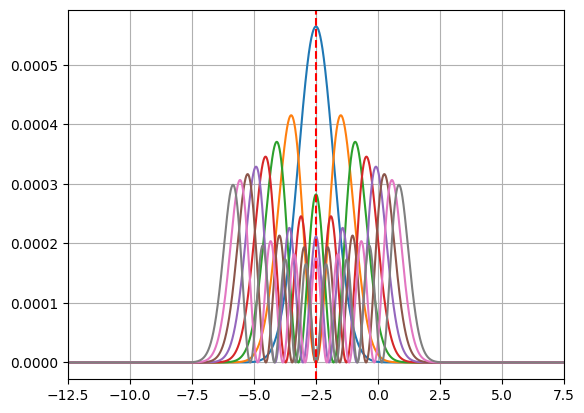

In [22]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)
  
plt.axvline(opr.r_t[0], color='red', linestyle='--')
plt.xlim(opr.r_t[0] - 10, opr.r_t[0] + 10)
plt.grid()
plt.show()

In [23]:
opr.infidelity()

0.001

In [7]:
opr.time_evolution(par, fixed_potential=False)

In [8]:
opr.rho

array([[ 1.865e-01+0.j    , -3.500e-03-0.0118j, -5.000e-04+0.0003j,
         0.000e+00+0.j    , -0.000e+00-0.j    ,  0.000e+00+0.j    ,
         0.000e+00-0.j    , -0.000e+00-0.j    ],
       [-3.500e-03+0.0118j,  1.696e-01+0.j    , -4.500e-03-0.0151j,
        -7.000e-04+0.0005j,  1.000e-04+0.0001j, -0.000e+00+0.0001j,
        -1.000e-04-0.j    , -0.000e+00-0.j    ],
       [-5.000e-04-0.0003j, -4.500e-03+0.0151j,  1.542e-01+0.j    ,
        -5.000e-03-0.0169j, -7.000e-04+0.0005j,  5.000e-04+0.0004j,
        -3.000e-04+0.0007j, -1.000e-04-0.j    ],
       [ 0.000e+00-0.j    , -7.000e-04-0.0005j, -5.000e-03+0.0169j,
         1.397e-01+0.j    , -5.600e-03-0.0189j,  1.300e-03-0.0008j,
         2.600e-03+0.0023j, -3.000e-04+0.0007j],
       [-0.000e+00+0.j    ,  1.000e-04-0.0001j, -7.000e-04-0.0005j,
        -5.600e-03+0.0189j,  1.230e-01+0.j    , -7.900e-03-0.0269j,
         8.300e-03-0.0053j,  2.700e-03+0.0023j],
       [ 0.000e+00-0.j    , -0.000e+00-0.0001j,  5.000e-04-0.0004j,
       

In [9]:
print("Energies\n", opr.energies)

Energies
 [0.9802986275605176, 1.9802995667029042, 2.9803005058452943, 3.980301444987695, 4.980302384130081, 5.980303323272483, 6.980304262414868, 7.980305201557273]


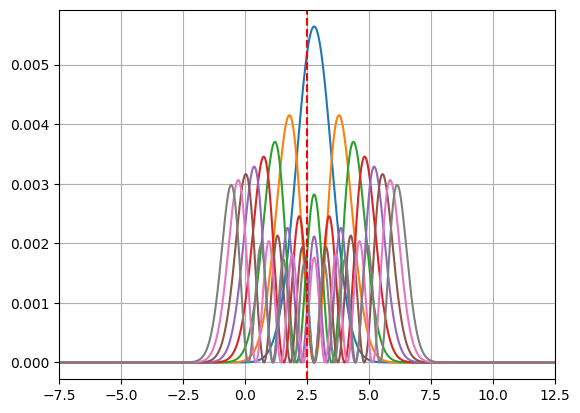

In [10]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(opr.r_t[-1] - 10, opr.r_t[-1] + 10)

plt.grid()
plt.show()

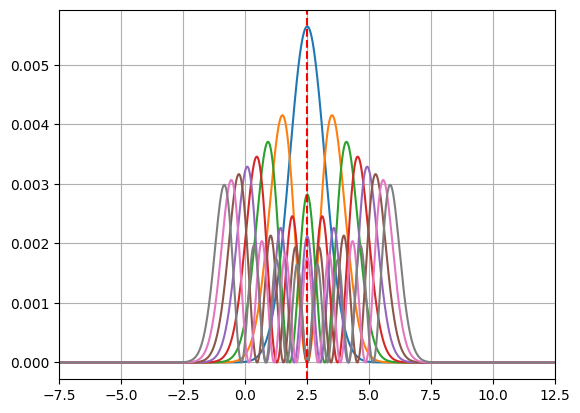

In [11]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.shifted_wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(opr.r_t[-1] - 10, opr.r_t[-1] + 10)
plt.grid()
plt.show()

In [12]:
opr.infidelity()

0.071911801700056882656

In [13]:
opr.time_evolution(par, fixed_potential=True)

In [14]:
opr.rho

array([[ 1.865e-01+0.j    , -3.500e-03-0.0118j, -5.000e-04+0.0003j,
         0.000e+00+0.j    ,  0.000e+00+0.j    , -0.000e+00-0.j    ,
        -0.000e+00-0.j    ,  0.000e+00-0.j    ],
       [-3.500e-03+0.0118j,  1.696e-01+0.j    , -4.500e-03-0.0152j,
        -7.000e-04+0.0005j,  1.000e-04+0.0001j, -0.000e+00+0.0001j,
        -1.000e-04-0.j    , -0.000e+00-0.j    ],
       [-5.000e-04-0.0003j, -4.500e-03+0.0152j,  1.541e-01+0.j    ,
        -5.000e-03-0.0169j, -7.000e-04+0.0005j,  5.000e-04+0.0005j,
        -3.000e-04+0.0007j, -1.000e-04-0.j    ],
       [ 0.000e+00-0.j    , -7.000e-04-0.0005j, -5.000e-03+0.0169j,
         1.397e-01+0.j    , -5.600e-03-0.019j ,  1.400e-03-0.0008j,
         2.700e-03+0.0023j, -3.000e-04+0.0007j],
       [ 0.000e+00-0.j    ,  1.000e-04-0.0001j, -7.000e-04-0.0005j,
        -5.600e-03+0.019j ,  1.229e-01+0.j    , -7.900e-03-0.027j ,
         8.400e-03-0.0053j,  2.700e-03+0.0023j],
       [-0.000e+00+0.j    , -0.000e+00-0.0001j,  5.000e-04-0.0005j,
       

In [15]:
print("Energies\n", opr.energies)

Energies
 [0.9809032724679283, 1.9809059029146616, 2.9809085333614034, 3.980911163808146, 4.980913794254899, 5.980916424701629, 6.98091905514836, 7.98092168559509]


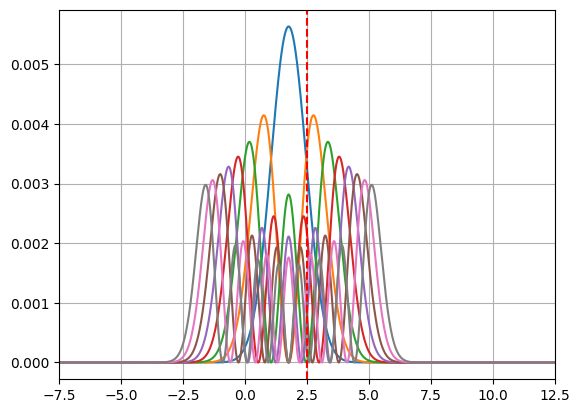

In [16]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(opr.r_t[-1] - 10, opr.r_t[-1] + 10)
plt.grid()
plt.show()

In [17]:
opr.infidelity()

0.0726999463464983092

In [18]:
opr.average_infidelity

0.07251829424092764008